10 November

In [ ]:
from google.colab import files
files.upload()

Saving diabetes_C119.csv to diabetes_C119.csv


{'diabetes_C119.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.2

In [ ]:
import pandas as pd
df=pd.read_csv('diabetes_C119.csv')

In [ ]:
#column name
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

df=pd.read_csv('diabetes_C119.csv', names=col_names).iloc[1:]

print(df.head())
print(df.tail())

  pregnant glucose  bp skin insulin   bmi pedigree age label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1
    pregnant glucose  bp skin insulin   bmi pedigree age label
764       10     101  76   48     180  32.9    0.171  63     0
765        2     122  70   27       0  36.8     0.34  27     0
766        5     121  72   23     112  26.2    0.245  30     0
767        1     126  60    0       0  30.1    0.349  47     1
768        1      93  70   31       0  30.4    0.315  23     0


In [ ]:
df.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [ ]:
features =['pregnant', 'insulin', 'bmi', 'pedigree', 'age', 'glucose', 'bp']
x=df[features]
y=df.label

splitting the data into training and testing and fitting in the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#splitting data in training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#initialising the Decision tree model 
clf = DecisionTreeClassifier()

#fitting the data into model 
clf = clf.fit(x_train,y_train)

#calculating the accuracy of the model 
y_pred = clf.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6623376623376623


## Visualising the Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#splitting the data in training and testing
x_ttrain, x_test, y_train, y_test = train_test_split(x_,y, test_size=0.3, random_state=1)

#initialising the Decision tree model
clf = DecisionTreeClassifier()

#fitting the data into model
cf = clf.fir(x_train, y_train)

#calculating tjhe accuracy of the model
y_pred = clf.predict(x_test)
print('Accuracy',metrics.accuracy_score(y_test, y_pred))

## Pruning means Cropping

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO() #where we will store the data from our decision tree classifier as text

export_graphviz(clf, out_file=dot_data, filled = True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<glucose &le; 129.5<br/>gini = 0.449<br/>samples = 537<br/>value = [354, 183]<br/>class = 0>, fillcolor="#f2c29f"] ;
1 [label=<bmi &le; 26.3<br/>gini = 0.329<br/>samples = 357<br/>value = [283, 74]<br/>class = 0>, fillcolor="#eca26d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<bmi &le; 9.1<br/>gini = 0.06<br/>samples = 97<br/>value = [94, 3]<br/>class = 0>, fillcolor="#e6853f"] ;
1 -> 2 ;
3 [label=<glucose &le; 114.5<br/>gini = 0.444<br/>samples = 6<br/>value = [4, 2]<br/>class = 0>, fillcolor="#f2c09c"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [4, 0]<br/>class = 0>, fillcolor="#e58139"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 5 ;
6 [label=<pedigree &le; 0.669<br/>gini = 0.022<br/>samples = 91<br/>value = [90, 1]<br/>class = 0>, fillc

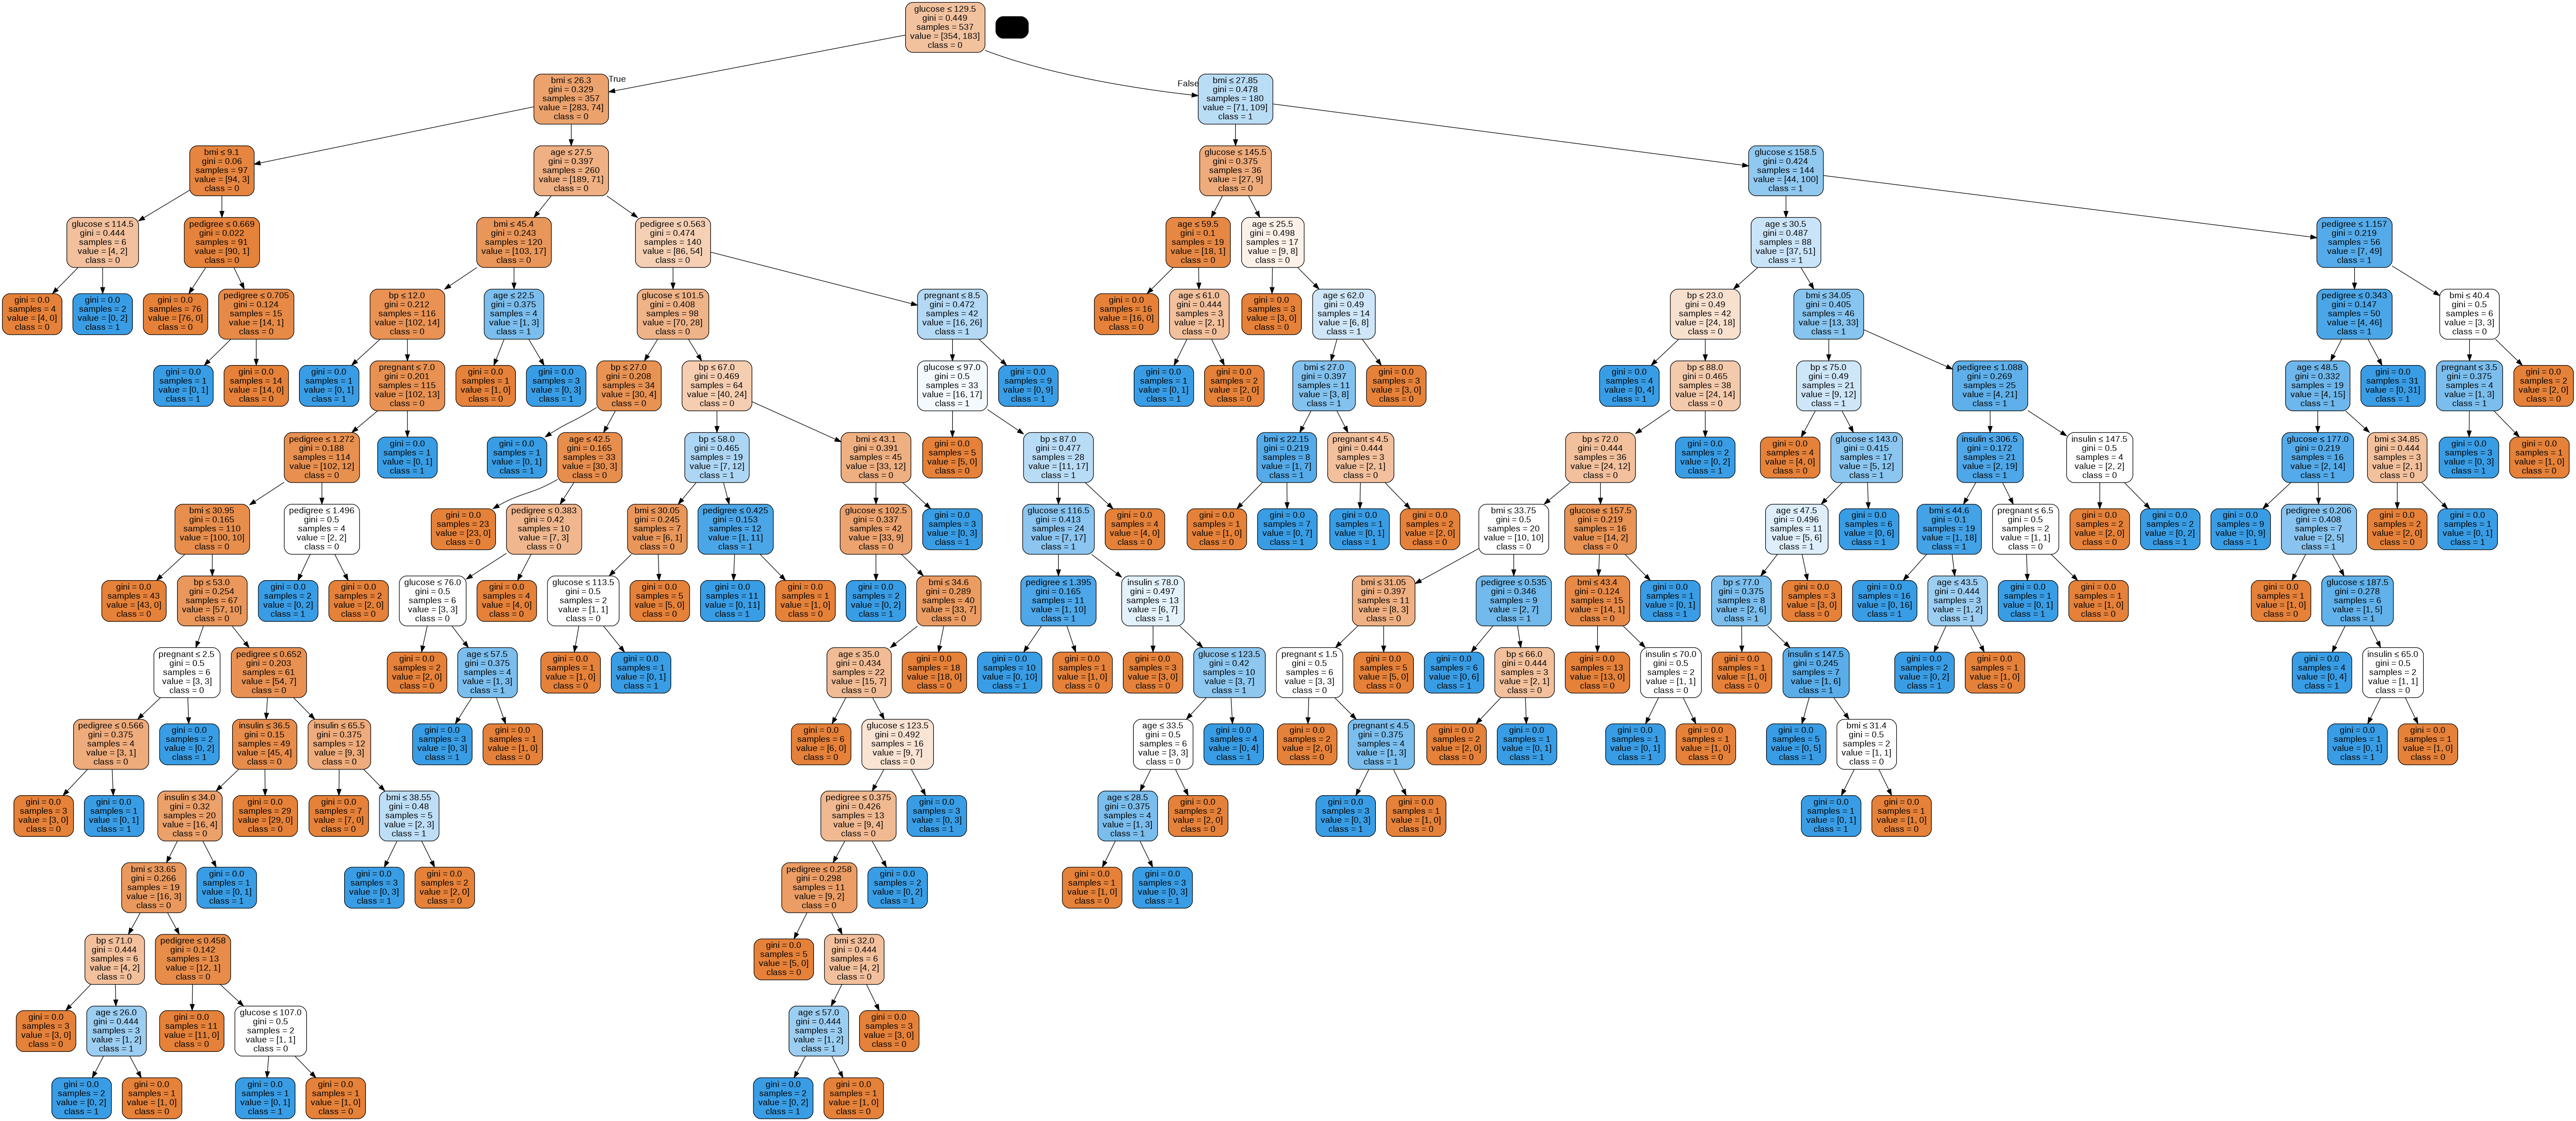

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

we can do that by doing some pruning. if we look at the charts above, we can see that our decisiomn tree goes much deeper from our root node. we can limit the max-depth of a decision tree model as per our convinience. lets work it out again

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


here we can see that by reducing the maximum depth we want our decision tree to go, we have also achieved a higher accuracy. Let's visualise this again

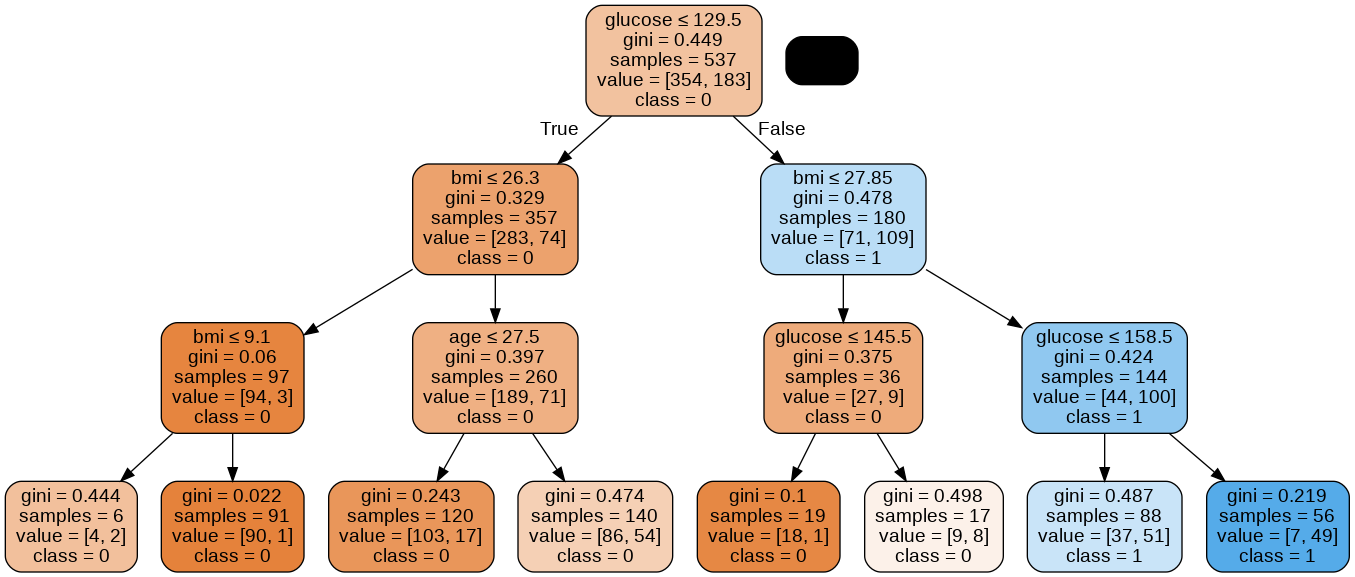

In [ ]:
dot_data = StringIO() #where we will store the data from our decision   tree classifier as text

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())